<a href="https://colab.research.google.com/github/lklymchuk/Python-projects/blob/main/Exploratory_data_analysis_for_online_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Data overview

In [124]:
# Connecting Google Drive
from google.colab import drive
drive.mount("/content/drive")

# Changing work folder
%cd /content/drive/MyDrive/Final project

# Uploading dataset Products
df_products = pd.read_csv("products.csv")
df_products.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Final project


,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


In [125]:
# Uploading dataset Events
df_events = pd.read_csv("events.csv")
df_events.head()


,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


In [126]:
# Uploading dataset Countries
df_countries = pd.read_csv("countries.csv")
df_countries.head()


,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


# Змінні
**id**, **Product ID** - код продукту;   
**item_type** - тип родукту;  
**Order ID** - номер замовлення;  
**Order Date** - дата замовлення;  
**Ship Date** - дата відвантаження товару;  
**Order Priority** - пріоритет замовлення;  
**Country Code**, **alpha-3** - код країни;  
**Sales Channel** - канал продажу товару;  
**Units Sold** - кількість проданих одиниць товарів;  
**Unit Price** - ціна за одиницю товару;  
**Unit Cost** - вартість виробництва одиниці товару;  
**name** - назва країни;  
**alpha-2** - дворівневий код країни;  
**region** - регіон світу, до якого належить країна;  
**sub-region** - підрегіон всередині основного регіону.  


Таблиці поєднуються через такі ключові поля:  
**products** та **events** — через **id** (у **products**) та **Product ID** (у **events**);  
**events** та **countries** — через **Country Code** (у **events**) та **alpha-3** (у **countries**).

# Data cleaning

In [127]:
# Check the number of missing values in each column
print(df_products.isna().sum())
print(df_events.isna().sum())
print(df_countries.isna().sum())


id           0
item_type    0
dtype: int64
Order ID           0
Order Date         0
Ship Date          0
Order Priority     0
Country Code      82
Product ID         0
Sales Channel      0
Units Sold         2
Unit Price         0
Unit Cost          0
dtype: int64
name          0
alpha-2       1
alpha-3       0
region        1
sub-region    1
dtype: int64


In [128]:
# Share of missed values
print(df_products.isna().sum() / df_products.shape[0] * 100)
print(df_events.isna().sum() / df_events.shape[0] * 100)
print(df_countries.isna().sum() / df_countries.shape[0] * 100)


id           0.0
item_type    0.0
dtype: float64
Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Order Priority    0.000000
Country Code      6.165414
Product ID        0.000000
Sales Channel     0.000000
Units Sold        0.150376
Unit Price        0.000000
Unit Cost         0.000000
dtype: float64
name          0.000000
alpha-2       0.401606
alpha-3       0.000000
region        0.401606
sub-region    0.401606
dtype: float64


In [129]:
# Fill missing values in "Country Code" with "Unknown"
df_events["Country Code"] = df_events["Country Code"].fillna("Unknown")

# Fill missing values in "Units Sold" with rounded mean
mean_units_sold = df_events["Units Sold"].mean()
df_events["Units Sold"] = df_events["Units Sold"].fillna(round(mean_units_sold))

# Fix missing metadata for Antarctica in df_countries
df_countries.loc[df_countries["alpha-3"] == "ATA", ["name", "alpha-2", "region", "sub-region"]] = \
    ["Antarctica", "AQ", "Antarctica", "Antarctica"]


У таблиці **events** було виявлено пропущені значення у колонці **Country Code** (понад 6%), тому я вирішила заповнити їх значенням **"Unknown"**, щоб зберегти всі записи та уникнути спотворення результатів при аналізі за країнами. Пропуски в колонці **Units Sold** були незначними (менше 1%), тому я заповнила їх середнім значенням, щоб не втрачати дані. У таблиці **countries** були відсутні значення для Антарктиди, тому я вручну додала офіційні коди та регіональну інформацію, щоб зробити таблицю повною.

In [130]:
# Check the shape of the dataframes
print(df_products.shape)
print(df_events.shape)
print(df_countries.shape)


(12, 2)
(1330, 10)
(249, 5)


In [131]:
# Check the information of dataframes
df_products.info()
df_events.info()
df_countries.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1330 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1330 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)


In [132]:
# Find out the data types in each column
print(df_products.dtypes)
print(df_events.dtypes)
print(df_countries.dtypes)


id            int64
item_type    object
dtype: object
Order ID            int64
Order Date         object
Ship Date          object
Order Priority     object
Country Code       object
Product ID          int64
Sales Channel      object
Units Sold        float64
Unit Price        float64
Unit Cost         float64
dtype: object
name          object
alpha-2       object
alpha-3       object
region        object
sub-region    object
dtype: object


In [133]:
# Convert the date column to datetime
df_events["Order Date"] = pd.to_datetime(df_events["Order Date"])
df_events["Ship Date"] = pd.to_datetime(df_events["Ship Date"])

In [134]:
print(df_products.dtypes)
print(df_events.dtypes)
print(df_countries.dtypes)

id            int64
item_type    object
dtype: object
Order ID                   int64
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Order Priority            object
Country Code              object
Product ID                 int64
Sales Channel             object
Units Sold               float64
Unit Price               float64
Unit Cost                float64
dtype: object
name          object
alpha-2       object
alpha-3       object
region        object
sub-region    object
dtype: object


In [135]:
# Checking for duplicates in data
print(df_products.duplicated().sum())
print(df_events.duplicated().sum())
print(df_countries.duplicated().sum())

0
0
0


In [136]:
# Capitalize column "Sales Chanel" values
df_events["Sales Channel"] = df_events["Sales Channel"].str.title()


In [137]:
# View descriptive statistics of the numeric columns of the dataset
df_products.describe()

,id
count,12.000000
mean,5802.166667
std,2937.985452
min,1270.000000
25%,2959.000000
50%,6659.500000
75%,8390.000000
max,8969.000000


In [138]:
df_events.describe(include=[np.number])


,Order ID,Product ID,Units Sold,Unit Price,Unit Cost
count,1.330000e+03,1330.000000,1330.000000,1330.000000,1330.000000
mean,5.412048e+08,5788.096241,4952.201504,264.893541,187.246812
std,2.573882e+08,2820.728878,2903.012170,217.323460,176.158873
min,1.006406e+08,1270.000000,2.000000,9.330000,6.920000
25%,3.190004e+08,3127.000000,2360.750000,81.730000,35.840000
50%,5.387164e+08,5988.000000,4958.000000,154.060000,97.440000
75%,7.544628e+08,8681.000000,7458.750000,437.200000,263.330000
max,9.998797e+08,8969.000000,9999.000000,668.270000,524.960000


In [139]:
df_countries.describe()

,name,alpha-2,alpha-3,region,sub-region
count,249,248,249,249,249
unique,249,248,249,6,18
top,Afghanistan,AF,AFG,Africa,Sub-Saharan Africa
freq,1,1,1,60,53


Видимих аномалій у статистичних зведеннях немає. Дані виглядають чистими і логічними для подальшого аналізу.

# Data analysis and visualization

In [140]:
# Join df_events and df_products using left join
merged_events_products = pd.merge(df_events, df_products, left_on="Product ID", right_on="id", how="left")

# Then join the result with df_countries using left join
final_merged_df = pd.merge(merged_events_products, df_countries, left_on="Country Code", right_on="alpha-3", how="left")


In [141]:
final_merged_df.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,id,item_type,name,alpha-2,alpha-3,region,sub-region
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,2103,Cereal,Norway,NO,NOR,Europe,Northern Europe
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,2103,Cereal,Serbia,RS,SRB,Europe,Southern Europe
2,101025998,2014-07-18,2014-08-11,M,Unknown,7940,Online,4693.0,668.27,502.54,7940,Household,NaN,NaN,NaN,NaN,NaN
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,2455,Clothes,Montenegro,ME,MNE,Europe,Southern Europe
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,1270,Beverages,Serbia,RS,SRB,Europe,Southern Europe


In [142]:
# Fill in the gaps in the dataset with the value unknown
final_merged_df = final_merged_df.fillna("Unknown")


In [143]:
# Delete duplicate columns
final_merged_df = final_merged_df.drop(columns=["id", "alpha-3"])


In [144]:
# Make the column names look the same by replacing "_" with a space
final_merged_df.columns = [col.replace("_", " ").title() for col in final_merged_df.columns]

In [145]:
final_merged_df["Units Sold"] = pd.to_numeric(final_merged_df["Units Sold"], errors="coerce")


In [146]:
final_merged_df["Order Date"] = pd.to_datetime(final_merged_df["Order Date"], errors="coerce")
final_merged_df["Ship Date"] = pd.to_datetime(final_merged_df["Ship Date"], errors="coerce")


In [147]:
final_merged_df[["Units Sold", "Order Date", "Ship Date"]].isna().sum()


,0
Units Sold,0
Order Date,0
Ship Date,0


In [148]:
invalid_units = final_merged_df[final_merged_df["Units Sold"].isna()]
print(invalid_units[["Units Sold", "Order Id"]])


Empty DataFrame
Columns: [Units Sold, Order Id]
Index: []


In [149]:
final_merged_df.dropna(subset=["Units Sold"], inplace=True)


In [150]:
final_merged_df.head()

,Order Id,Order Date,Ship Date,Order Priority,Country Code,Product Id,Sales Channel,Units Sold,Unit Price,Unit Cost,Item Type,Name,Alpha-2,Region,Sub-Region
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,Cereal,Norway,NO,Europe,Northern Europe
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,Cereal,Serbia,RS,Europe,Southern Europe
2,101025998,2014-07-18,2014-08-11,M,Unknown,7940,Online,4693.0,668.27,502.54,Household,Unknown,Unknown,Unknown,Unknown
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,Clothes,Montenegro,ME,Europe,Southern Europe
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,Beverages,Serbia,RS,Europe,Southern Europe


In [151]:
# Find the total number of orders
total_orders = final_merged_df.shape[0]
print(f"Total number of orders: {total_orders}")

Total number of orders: 1330


In [152]:
final_merged_df.dtypes

,0
Order Id,int64
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Order Priority,object
Country Code,object
Product Id,int64
Sales Channel,object
Units Sold,float64
Unit Price,float64
Unit Cost,float64


In [153]:
# Find the total profit
final_merged_df["Profit"] = final_merged_df["Unit Cost"] * final_merged_df["Units Sold"]
total_profit = final_merged_df["Profit"].sum()
print(f"Total profit: {total_profit:.2f}")

Total profit: 1202781523.93


In [154]:
# Find the total number of countries covered
total_countries = final_merged_df["Name"].nunique()
print(f"Total number of countries covered: {total_countries}")


Total number of countries covered: 46


In [155]:
# Find the total number of products
total_products = final_merged_df["Units Sold"].sum()
print(f"Total number of products: {total_products}")

Total number of products: 6586428.0


In [156]:
# Find the total revenue
total_sales = final_merged_df["Unit Price"] * final_merged_df["Units Sold"]
total_sales = total_sales.sum()
print(f"Total sales: {total_sales:.2f}")

Total sales: 1704623334.45


In [157]:
# Average profit per order
average_profit_per_order = total_profit / total_orders
print(f"Average profit per order: {average_profit_per_order:.2f}")

Average profit per order: 904347.01


In [158]:
# Average sale per order
average_sale_per_order = total_sales / total_orders
print(f"Average sale per order: {average_sale_per_order:.2f}")

Average sale per order: 1281671.68


In [159]:
# Add columns Revenue, Cost and Profit
final_merged_df["Revenue"] = final_merged_df["Unit Price"] * final_merged_df["Units Sold"]
final_merged_df["Cost"] = final_merged_df["Unit Cost"] * final_merged_df["Units Sold"]
final_merged_df["Profit"] = final_merged_df["Revenue"] - final_merged_df["Cost"]
final_merged_df.head()


,Order Id,Order Date,Ship Date,Order Priority,Country Code,Product Id,Sales Channel,Units Sold,Unit Price,Unit Cost,Item Type,Name,Alpha-2,Region,Sub-Region,Profit,Revenue,Cost
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,Cereal,Norway,NO,Europe,Northern Europe,57583.50,133705.00,76121.50
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,Cereal,Serbia,RS,Europe,Southern Europe,176559.87,409960.10,233400.23
2,101025998,2014-07-18,2014-08-11,M,Unknown,7940,Online,4693.0,668.27,502.54,Household,Unknown,Unknown,Unknown,Unknown,777770.89,3136191.11,2358420.22
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,Clothes,Montenegro,ME,Europe,Southern Europe,85998.24,127966.88,41968.64
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,Beverages,Serbia,RS,Europe,Southern Europe,119767.68,362897.60,243129.92


# 1.

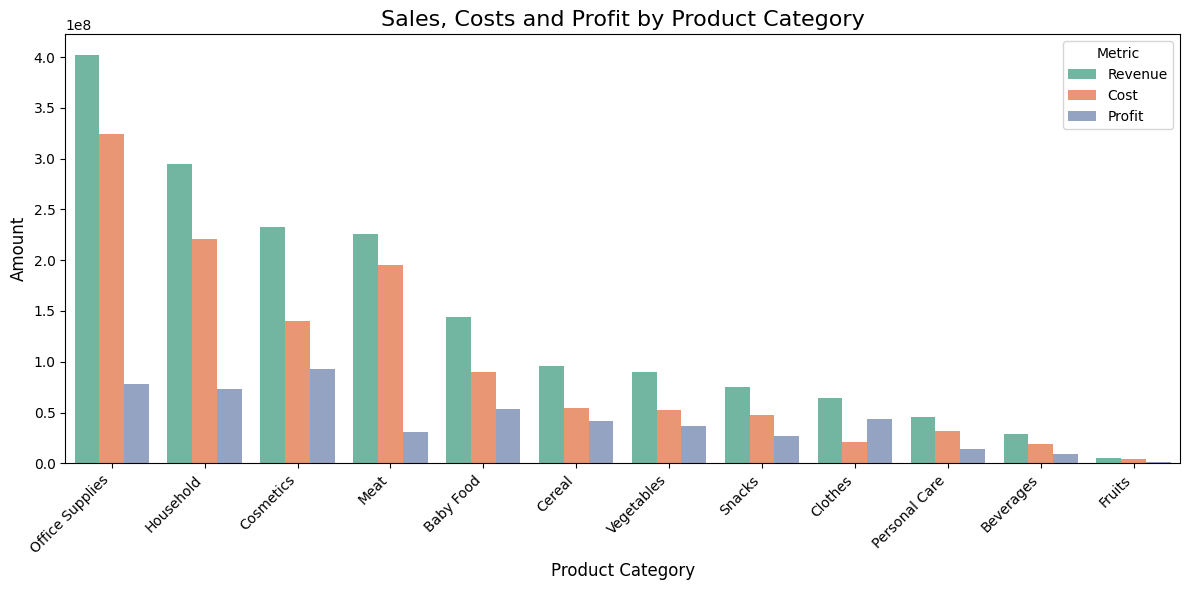

In [160]:
# Sales by product category (Item Type)
category_stats = final_merged_df.groupby("Item Type").agg({
    "Revenue": "sum",
    "Cost": "sum",
    "Profit": "sum"
}).reset_index().sort_values(by="Revenue", ascending=False)

melted_stats = category_stats.melt(id_vars="Item Type",
                                   value_vars=["Revenue", "Cost", "Profit"],
                                   var_name="Metric", value_name="Amount")

plt.figure(figsize=(12, 6))
sns.barplot(data=melted_stats, x="Item Type", y="Amount", hue="Metric", palette="Set2")

plt.title("Sales, Costs and Profit by Product Category", fontsize=16)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Amount", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

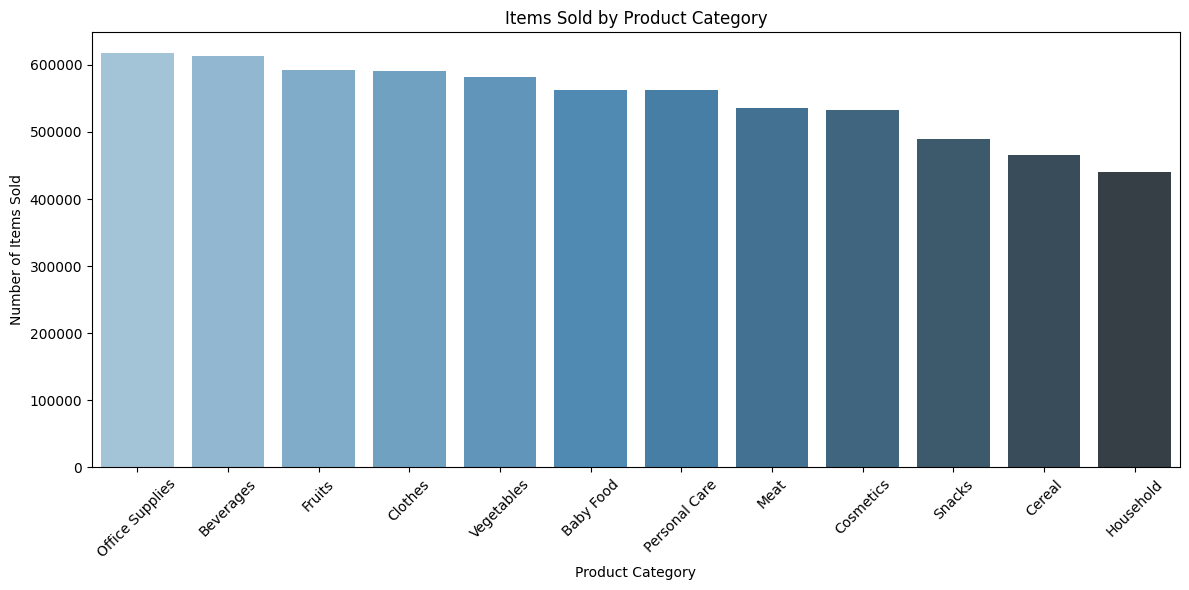

In [161]:
# Items sold by product category
items_sold_by_category = final_merged_df.groupby("Item Type")["Units Sold"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))

sns.barplot(
    x=items_sold_by_category.index,
    y=items_sold_by_category.values,
    hue=items_sold_by_category.index,  # explicitly set hue to match x
    palette="Blues_d",
    legend=False  # hide redundant legend
)

plt.title("Items Sold by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Number of Items Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Продажі в розрізі категорій
## Висновок

Найбільший дохід приносять категорії: **Office Supplies**, **Household**, **Cosmetics**, **Meat** та **Baby Food**, в той час як категорія **Fruits** приносить найменший дохід. Категорія **Meat** має високу вартість виробництва, а **Clothes** забезпечує значно вищий прибуток, ніж вартість виготовлення. Найбільша популярність спостерігається у категоріях: **Office Supplies**, **Beverages**, **Fruits**, **Clothes** та **Vegetables**. Однак ці категорії мають порівняно низький дохід, що вказує на їхню популярність завдяки доступним цінам.

## Рекомендація
Необхідно враховувати, що популярні категорії з низьким доходом можуть бути стратегічно важливими для залучення клієнтів, тому варто оптимізувати ціни або шукати способи зниження витрат для підвищення маржі.

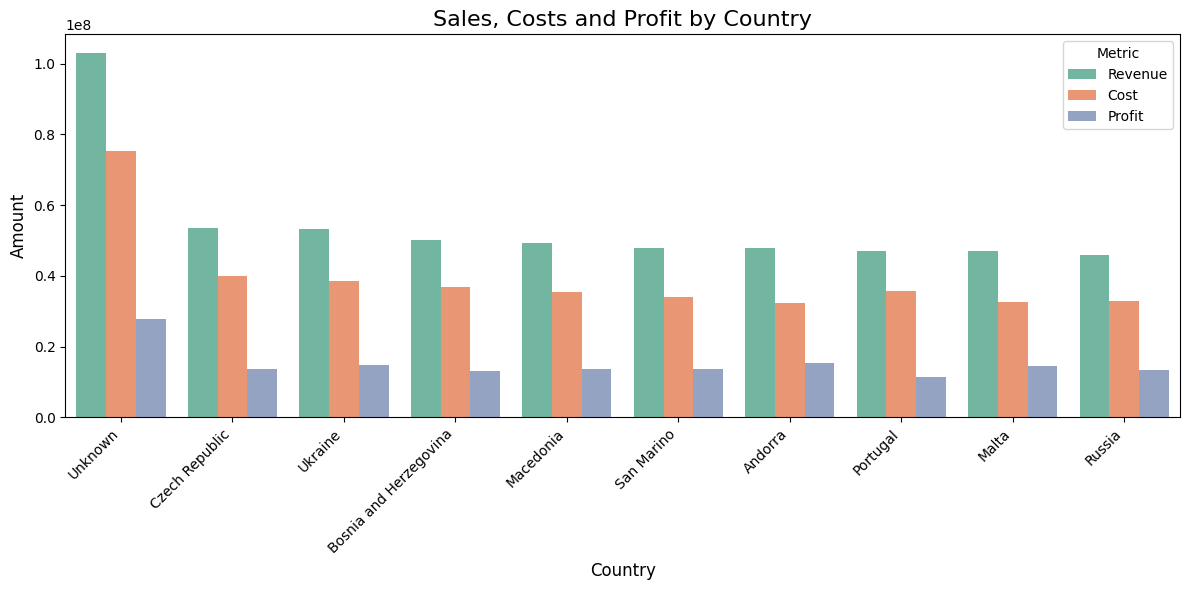

In [162]:
# Sales by Countries
country_stats = final_merged_df.groupby("Name").agg({
    "Revenue": "sum",
    "Cost": "sum",
    "Profit": "sum"
}).sort_values(by="Revenue", ascending=False).head(10)

melted_country = country_stats.reset_index().melt(
    id_vars="Name",
    value_vars=["Revenue", "Cost", "Profit"],
    var_name="Metric",
    value_name="Amount"
)

plt.figure(figsize=(12, 6))
sns.barplot(data=melted_country, x="Name", y="Amount", hue="Metric", palette="Set2")
plt.title("Sales, Costs and Profit by Country", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Amount", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


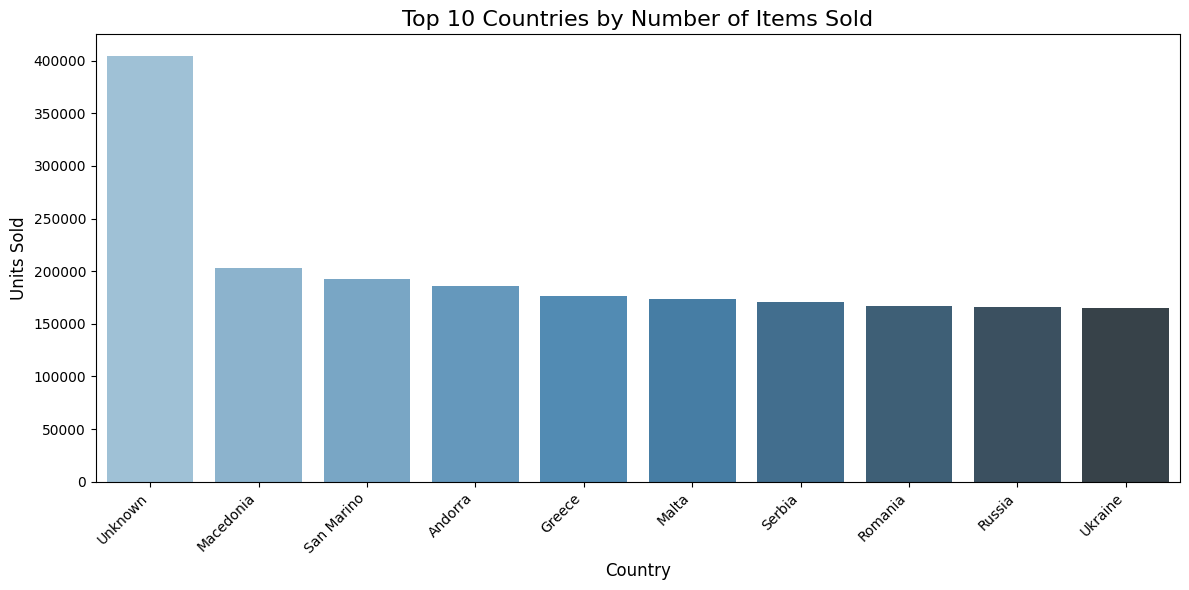

In [163]:
# Items sold by country
items_sold_by_country = final_merged_df.groupby("Name")["Units Sold"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))

sns.barplot(
    x=items_sold_by_country.index,
    y=items_sold_by_country.values,
    hue=items_sold_by_country.index,  # required to apply palette per bar
    palette="Blues_d",
    legend=False
)

plt.title("Top 10 Countries by Number of Items Sold", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Units Sold", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


# Продажі в розрізі країн
## Висновок

Найвищий дохід від продажів отримують країни: **Czech Republic**, **Ukraine**, **Bosnia and Herzegovina**, **Macedonia**, **San Marino**, де доходи, витрати та прибутки залишаються стабільними. Лідерами за кількістю проданих одиниць є **Macedonia**, **San Marino**, **Andorra**, **Greece**, **Malta**, що вказує на високий обсяг продажів недорогих товарів. Варто звернути увагу на значну кількість продажів без зазначення країни, що може спотворювати географічний аналіз.

## Рекомендація
Рекомендується зібрати більш точні дані щодо країни для продажів з пропущеними значеннями, щоб покращити точність аналізу та визначити можливі регіональні стратегії.






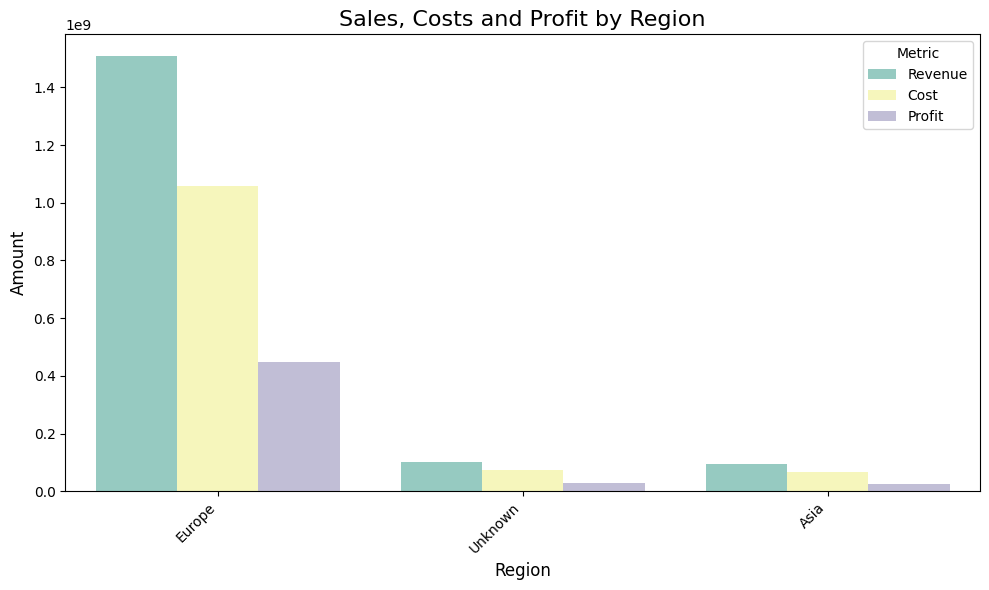

In [164]:
# Sales by Region
region_stats = final_merged_df.groupby("Region").agg({
    "Revenue": "sum",
    "Cost": "sum",
    "Profit": "sum"
}).sort_values(by="Revenue", ascending=False)

melted_region = region_stats.reset_index().melt(
    id_vars="Region",
    value_vars=["Revenue", "Cost", "Profit"],
    var_name="Metric",
    value_name="Amount"
)

plt.figure(figsize=(10, 6))
sns.barplot(data=melted_region, x="Region", y="Amount", hue="Metric", palette="Set3")
plt.title("Sales, Costs and Profit by Region", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Amount", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


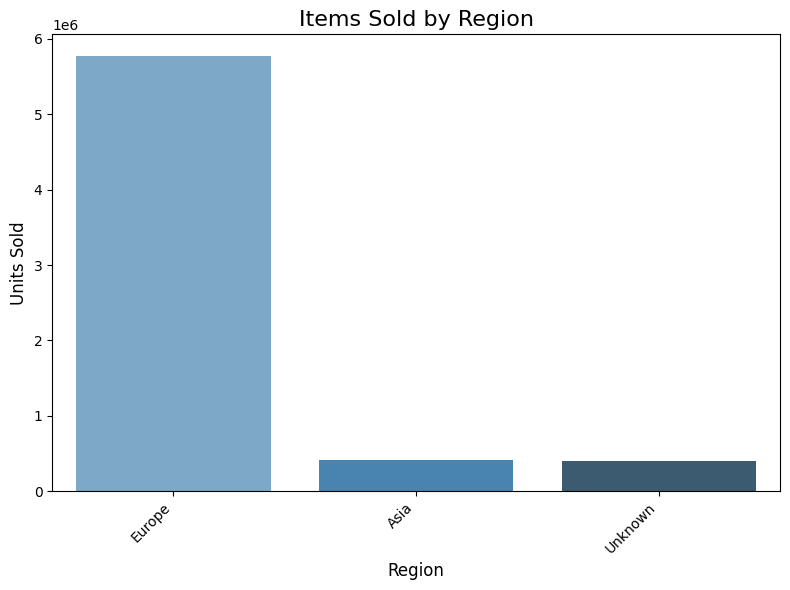

In [165]:
# Items sold by Region
items_sold_by_region = final_merged_df.groupby("Region")["Units Sold"].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 6))

# Use hue=x and disable legend to comply with Seaborn >=0.14
sns.barplot(
    x=items_sold_by_region.index,
    y=items_sold_by_region.values,
    hue=items_sold_by_region.index,  # Needed to apply palette
    palette="Blues_d",
    legend=False
)

plt.title("Items Sold by Region", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Units Sold", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


# Продажі в розрізі регіонів
## Висновок

Європа є лідером за доходом та кількістю проданих одиниць товарів. Дохід від продажів з невизначеним регіоном перевищує дохід з Азії, однак Азія займає друге місце за кількістю проданих одиниць, що може свідчити про великий попит на дешевші товари.

## Рекомендація
Рекомендується зосередитися на стратегіях, що сприяють збільшенню точності визначення регіонів для подальшого підвищення ефективності продажів в Азії.

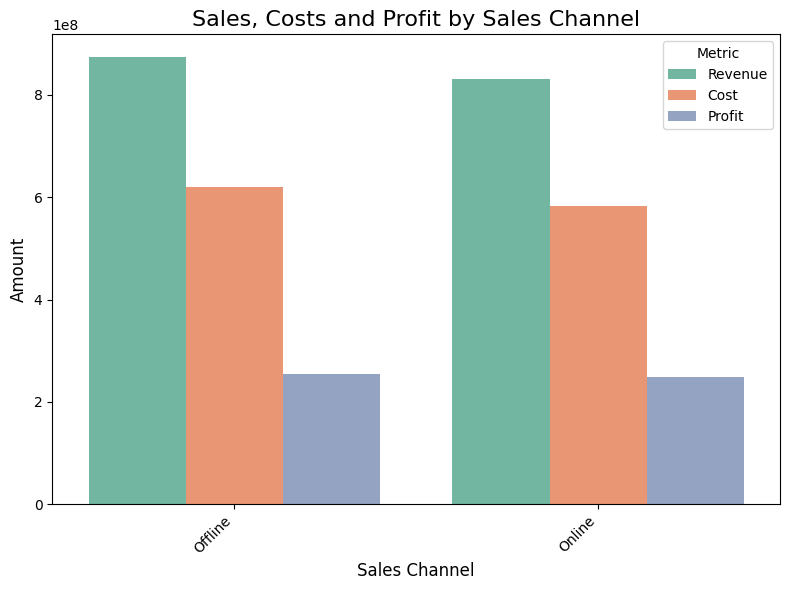

In [166]:
# Sales by Channel
channel_stats = final_merged_df.groupby("Sales Channel").agg({
    "Revenue": "sum",
    "Cost": "sum",
    "Profit": "sum"
}).sort_values(by="Revenue", ascending=False)

melted_channel = channel_stats.reset_index().melt(
    id_vars="Sales Channel",
    value_vars=["Revenue", "Cost", "Profit"],
    var_name="Metric",
    value_name="Amount"
)

plt.figure(figsize=(8, 6))
sns.barplot(data=melted_channel, x="Sales Channel", y="Amount", hue="Metric", palette="Set2")
plt.title("Sales, Costs and Profit by Sales Channel", fontsize=16)
plt.xlabel("Sales Channel", fontsize=12)
plt.ylabel("Amount", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

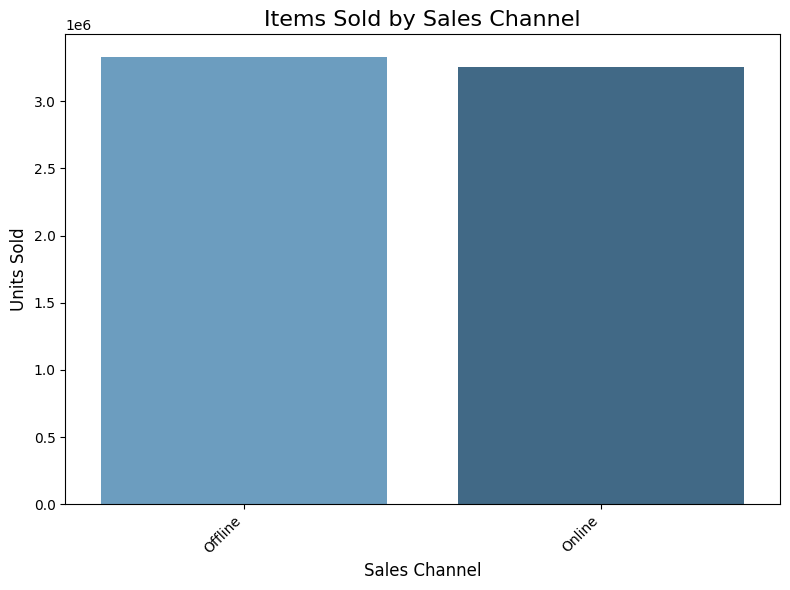

In [167]:
# Items sold by Sales Channel
items_sold_by_channel = final_merged_df.groupby("Sales Channel")["Units Sold"].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 6))

sns.barplot(
    x=items_sold_by_channel.index,
    y=items_sold_by_channel.values,
    hue=items_sold_by_channel.index,
    palette="Blues_d",
    legend=False
)

plt.title("Items Sold by Sales Channel", fontsize=16)
plt.xlabel("Sales Channel", fontsize=12)
plt.ylabel("Units Sold", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


# Продажі в розрізі каналів продажу
## Висновок

Офлайн-продажі мають незначну перевагу над онлайн-продажами за доходом і кількістю проданих одиниць, але різниця між каналами є мінімальною, що вказує на приблизно однакову ефективність обох форматів.

## Рекомендація
Рекомендується продовжувати підтримувати баланс між офлайн і онлайн каналами продажу, зважаючи на схожу ефективність обох форматів.

# 2.

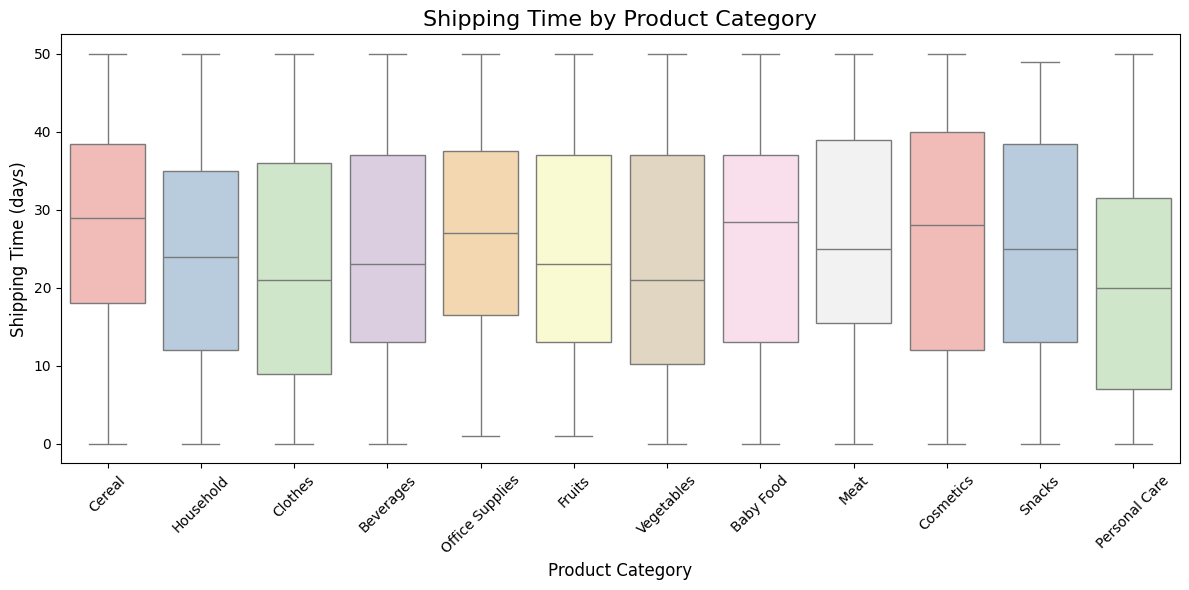

In [168]:
# Calculate shipping time in days
final_merged_df["Shipping Time"] = (final_merged_df["Ship Date"] - final_merged_df["Order Date"]).dt.days

plt.figure(figsize=(12, 6))

sns.boxplot(
    data=final_merged_df,
    x="Item Type",
    y="Shipping Time",
    hue="Item Type",         # explicitly set hue to match x-axis
    palette="Pastel1",
    legend=False             # hide the redundant legend
)

plt.title("Shipping Time by Product Category", fontsize=16)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Shipping Time (days)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Інтервал часу між замовленням та його відвантаженням в розрізі категорій товарів
## Висновок

Товари з категорій Personal Care, Clothes та Vegetables мають найшвидшу доставку, тоді як для категорій Cereal, Meat та Cosmetics доставка займає більше часу. Загалом, час доставки варіюється від 8 до 40 днів в залежності від категорії товару.

## Рекомендація
Рекомендується оптимізувати процеси доставки для категорій Cereal, Meat та Cosmetics, аби зменшити час доставки і покращити задоволення клієнтів.


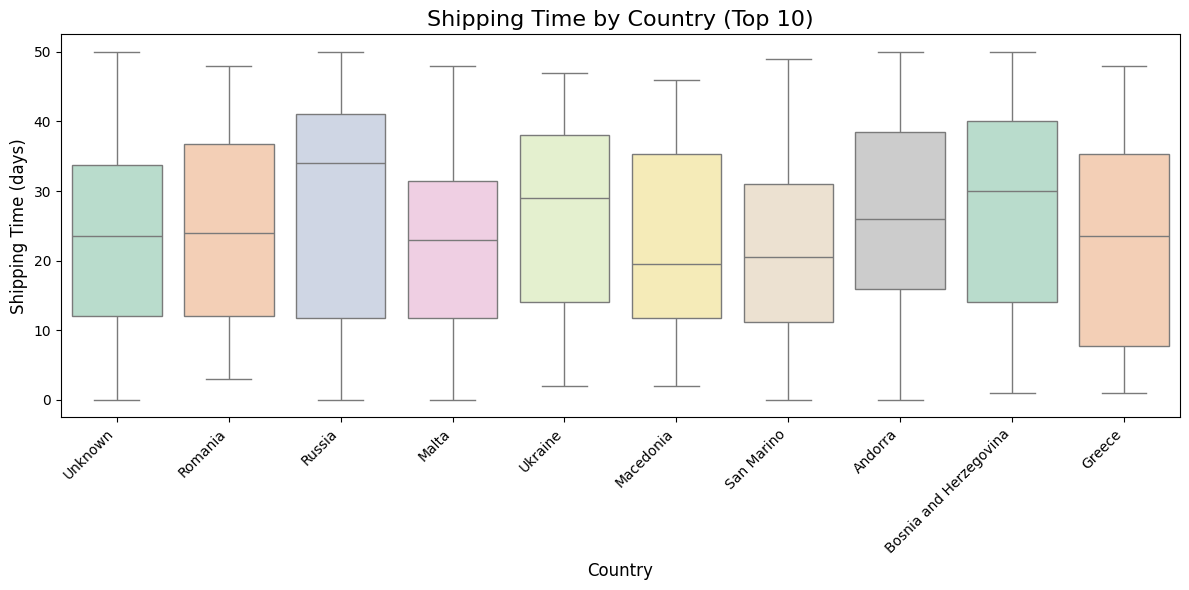

In [169]:
# Analyze the time interval between the order and its shipment and visualize by Country

# Select top 10 countries by frequency
top_countries = final_merged_df["Name"].value_counts().head(10).index
top_country_df = final_merged_df[final_merged_df["Name"].isin(top_countries)]

plt.figure(figsize=(12, 6))

sns.boxplot(
    data=top_country_df,
    x="Name",
    y="Shipping Time",
    hue="Name",             # explicitly match x with hue
    palette="Pastel2",
    legend=False            # hide redundant legend
)

plt.title("Shipping Time by Country (Top 10)", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Shipping Time (days)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


# Інтервал часу між замовленням та його відвантаженням в розрізі країн
## Висновок

**Найшвидше** товари доставляються до Греції (Greece), Мальти (Malta) та Сан-Маріно (San Marino).

**Найдовший час** доставки спостерігається до Андорри (Andorra), України (Ukraine) та Боснії і Герцеговини (Bosnia and Herzegovina).

## Рекомендація
Рекомендується зосередити увагу на оптимізації логістичних процесів для країн з довгим часом доставки, таких як Андорра, Україна та Боснія і Герцеговина, для покращення ефективності доставки.

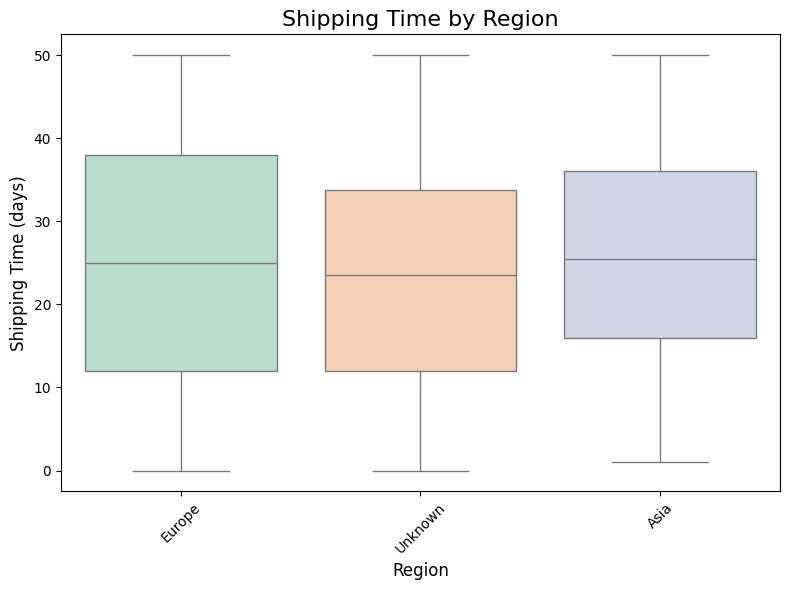

In [170]:
# Analyze the time interval between the order and its shipment and make visualizations by Region
plt.figure(figsize=(8, 6))

sns.boxplot(
    data=final_merged_df,
    x="Region",
    y="Shipping Time",
    hue="Region",
    palette="Pastel2",
    legend=False
)

plt.title("Shipping Time by Region", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Shipping Time (days)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Інтервал часу між замовленням та його відвантаженням в розрізі регіонів
## Висновок

Час доставки до Європи коливається в межах від 12 до 38 днів, тоді як до Азії — від 15 до 35 днів. Це може бути зумовлено ширшим географічним охопленням країн у цих регіонах.

Значну частину в аналізі становлять замовлення, для яких регіон не вказано.

## Рекомендація
Для поліпшення точності аналізу варто мінімізувати кількість замовлень без вказаного регіону, а також оптимізувати час доставки до Азії та Європи для скорочення термінів доставки.

# 3.

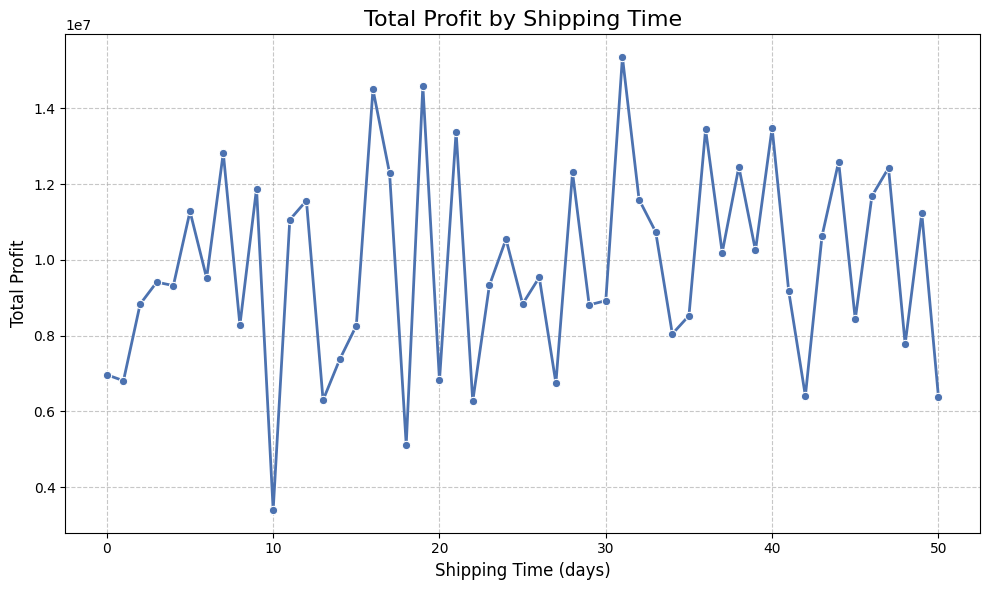

In [171]:
# Analyze whether the profit depends on the time required to ship the goods
profit_by_delivery = final_merged_df.groupby("Shipping Time")["Profit"].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x="Shipping Time", y="Profit", data=profit_by_delivery, marker="o", linewidth=2, color="#4c72b0")
plt.title("Total Profit by Shipping Time", fontsize=16)
plt.xlabel("Shipping Time (days)", fontsize=12)
plt.ylabel("Total Profit", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [172]:
correlation = final_merged_df["Shipping Time"].corr(final_merged_df["Profit"])
print(f"Quotient of correlation: {correlation:.2f}")

Quotient of correlation: 0.06


**Кореляція** між прибутком і часом доставки становить **0.06**, що вказує на дуже слабкий і практично відсутній зв'язок. Це означає, що час, необхідний на відвантаження товару, не впливає на прибуток.

# 4.

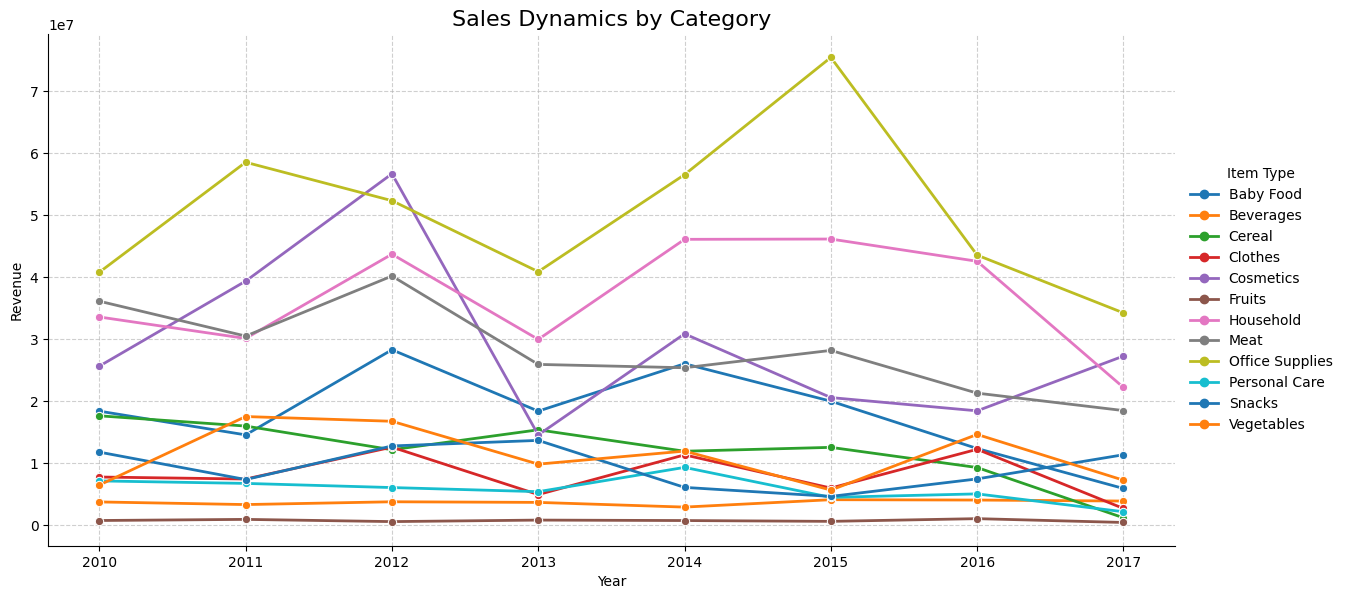

In [173]:
# Analyse sales dynamics by Category (Item Type)
final_merged_df["Year"] = final_merged_df["Order Date"].dt.year

yearly_sales_by_category = final_merged_df.groupby(["Year", "Item Type"])["Revenue"].sum().reset_index()

sns.relplot(
    data=yearly_sales_by_category,
    x="Year",
    y="Revenue",
    hue="Item Type",
    kind="line",
    height=6,
    aspect=2,
    linewidth=2,
    marker="o",
    palette="tab10"
)
plt.title("Sales Dynamics by Category", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


# Аналіз динаміки продажів у розрізі категорій товарів
## Висновок

Категорії Fruits, Vegetables та Personal Care демонструють стабільно низький рівень доходу протягом усього періоду спостереження.

Інші категорії мають більш варіативну динаміку:

У 2011 році спостерігається зростання доходів у категоріях Office Supplies, Cosmetics та Beverages, водночас Meat, Household, Baby Food і Snacks демонструють спад.

У 2012 році більшість категорій фіксує приріст доходу.

У 2013 році майже в усіх категоріях відбувається зниження продажів.

У 2015 році знову фіксується зростання доходів у більшості категорій, за винятком Beverages, Clothes та Personal Care, які показують спад. Вже наступного року ці три категорії демонструють зростання.

## Рекомендація
Варто звернути увагу на сезонні коливання доходів для категорій з високою варіативністю, зокрема для Beverages, Clothes та Personal Care, та адаптувати стратегію продажів для максимізації доходів у періоди спадів.

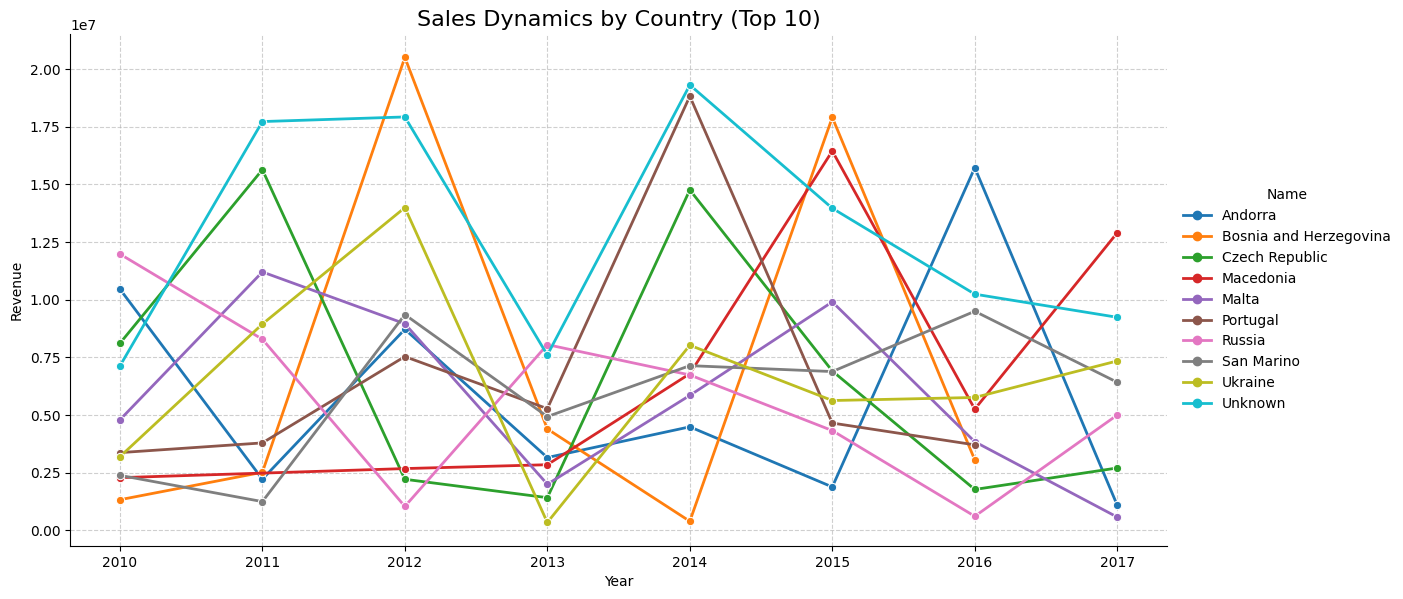

In [174]:
# Analyse sales dynamics by Country
yearly_sales_by_country = final_merged_df.groupby(["Year", "Name"])["Revenue"].sum().reset_index()

top_countries = final_merged_df.groupby("Name")["Revenue"].sum().sort_values(ascending=False).head(10).index
yearly_sales_by_country = yearly_sales_by_country[yearly_sales_by_country["Name"].isin(top_countries)]

sns.relplot(
    data=yearly_sales_by_country,
    x="Year",
    y="Revenue",
    hue="Name",
    kind="line",
    height=6,
    aspect=2,
    linewidth=2,
    marker="o",
    palette="tab10"
)
plt.title("Sales Dynamics by Country (Top 10)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


# Аналіз динаміки продажів в розрізі країн
## Висновок
На графіку простежуються різноспрямовані тенденції — у той час як в одних країнах дохід зростає, в інших він знижується. Винятком є 2013 рік, коли всі країни зазнали спаду продажів. У 2014 році відбулося відновлення доходів, проте темпи зростання відрізнялися залежно від країни. У наступні роки також спостерігались періодичні коливання.

## Рекомендація
Рекомендується зосередити увагу на країнах з нестабільною динамікою доходів і розробити спеціалізовані стратегії для стимулювання продажів у періоди спаду, особливо враховуючи коливання в різних країнах.

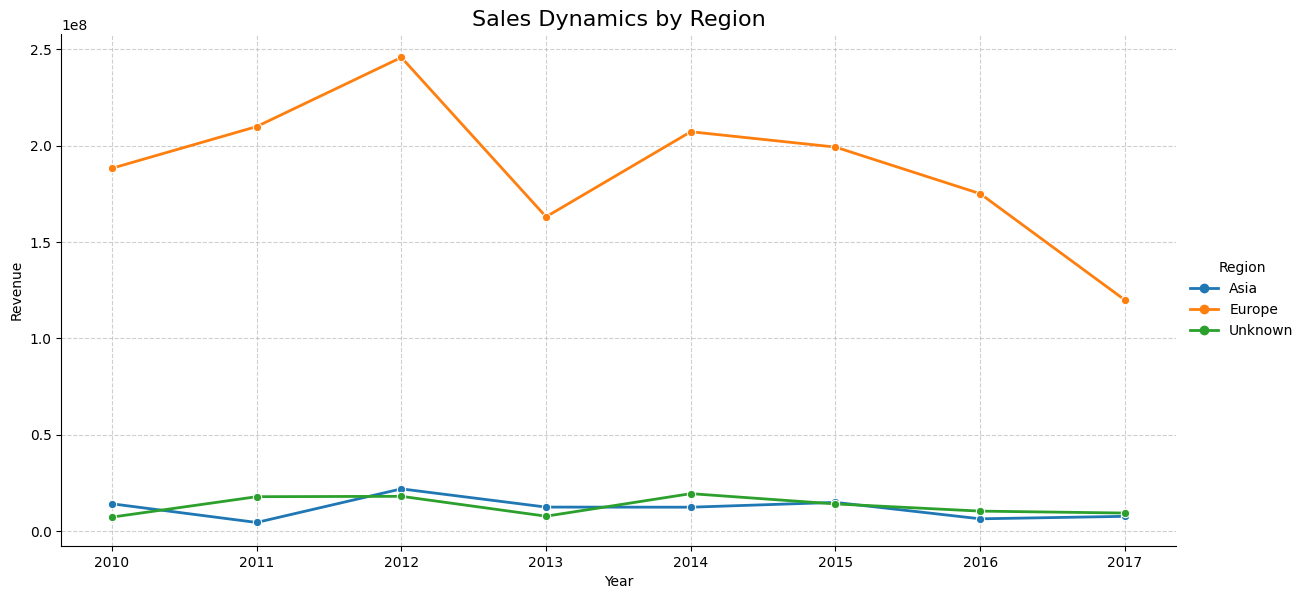

In [175]:
# Analyse sales dynamics by Region
yearly_sales_by_region = final_merged_df.groupby(["Year", "Region"])["Revenue"].sum().reset_index()

sns.relplot(
    data=yearly_sales_by_region,
    x="Year",
    y="Revenue",
    hue="Region",
    kind="line",
    height=6,
    aspect=2,
    linewidth=2,
    marker="o",
    palette="tab10"
)
plt.title("Sales Dynamics by Region", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Аналіз динаміки продажів у розрізі регіонів
## Висновок

У **Європі** доходи від продажів зростали впродовж 2010–2012 років, однак у 2013 спостерігався різкий спад. Уже в 2014 році відбувся стрибок з подальшим поступовим зниженням у наступні роки.

В **Азії** динаміка доходів була менш вираженою. Найнижчий рівень доходу припав на 2011 рік, а найвищий — на 2012. Подальші зміни були незначними й демонстрували відносну стабільність.

## Рекомендація
Рекомендується зосередитись на підтримці і стимулюванні продажів у Європі, зокрема в періоди після спадів, а також розглянути можливість подальшої оптимізації продажів в Азії для підтримки стабільного доходу.

# 5.

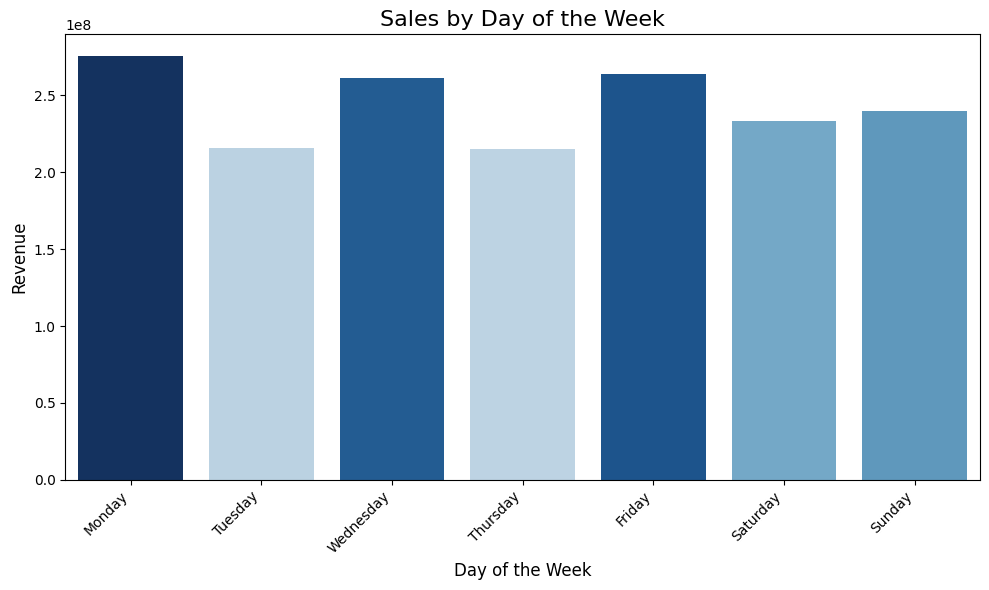

In [176]:
# Analyse sales dynamics by day of the week
final_merged_df["Day of Week"] = final_merged_df["Order Date"].dt.day_name()
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_of_week_sales = (
    final_merged_df.groupby("Day of Week")["Revenue"]
    .sum()
    .reindex(day_order)
)

norm = (day_of_week_sales - day_of_week_sales.min()) / (day_of_week_sales.max() - day_of_week_sales.min())

from matplotlib import cm
bar_colors = [cm.Blues(0.3 + x * 0.7) for x in norm]

plt.figure(figsize=(10, 6))
sns.barplot(x=day_of_week_sales.index, y=day_of_week_sales.values, palette=bar_colors, hue=day_of_week_sales.index, legend=False)
plt.title("Sales by Day of the Week", fontsize=16)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Аналіз продажів товарів за днями тижня
## Висновок

**Найвищі** обсяги продажів спостерігаються в понеділок, середу та пʼятницю.

У вихідні дні (субота та неділя) рівень продажів був нижчим, але не найменшим.

**Найнижчі** показники продажів зафіксовано у вівторок і четвер.

## Рекомендація
Рекомендується сфокусувати рекламні кампанії та акції на початку тижня (понеділок, середа, пʼятниця), а також розглянути можливість стимулювання продажів у вівторок і четвер для збільшення обсягів у ці дні.

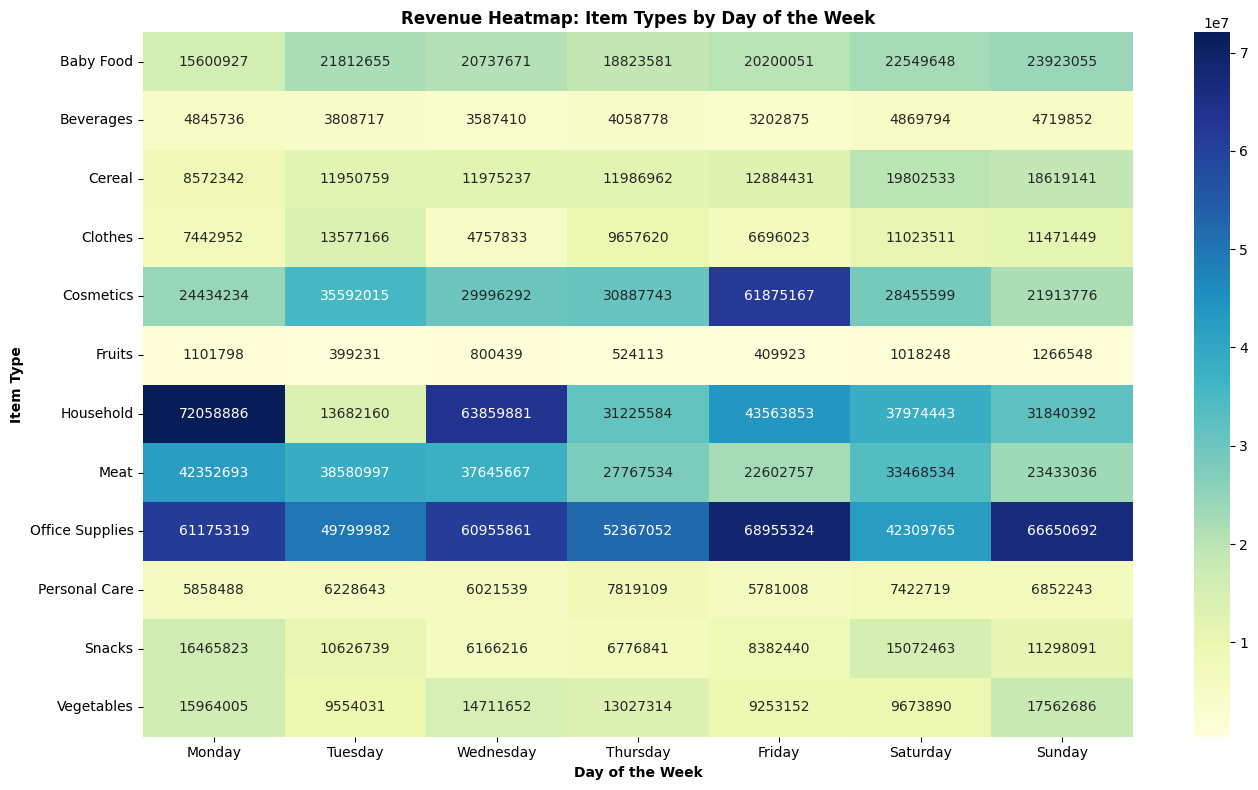

In [177]:
# Analyse sales dynamics by day of the week and category
pivot_table = final_merged_df.pivot_table(
    index="Item Type", columns="Day of Week", values="Revenue", aggfunc="sum"
)

day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
pivot_table = pivot_table[day_order]

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Revenue Heatmap: Item Types by Day of the Week", fontweight="bold", fontsize=12)
plt.xlabel("Day of the Week", fontweight="bold")
plt.ylabel("Item Type", fontweight="bold")
plt.tight_layout()
plt.show()


# Аналіз продажів товарів за днями тижня
## Висновок

Графік показує, що поведінка покупців варіюється в залежності від категорії товару, що може свідчити про внутрішньотижневу сезонність:

**Baby Food** має підвищений попит у вівторок, середу, суботу та неділю, що може бути пов’язано з регулярністю покупок дитячих продуктів кілька разів на тиждень.

**Cereal** демонструє зростання продажів на вихідних, що може пояснюватися покупками на сніданки чи закупівлею впрок.

**Clothes** частіше купують у вівторок, четвер та на вихідних, ймовірно, через зручний час для онлайн/офлайн-шопінгу.

**Household** товари мають стабільний попит у понеділок, середу та пʼятницю, можливо, у зв’язку з плановими домашніми справами.

**Meat** найчастіше купується на початку тижня (понеділок–середа) та в суботу, що може бути пов’язано з плануванням страв на тиждень і вихідні.

**Snacks** купують переважно в понеділок та суботу, що може свідчити як про офісне споживання, так і підготовку до вихідних.

**Vegetables** мають стабільний попит у понеділок, середу, четвер і неділю, що, ймовірно, пов’язано з регулярними закупівлями свіжих продуктів.

## Рекомендація
Для кожної категорії товарів варто врахувати внутрішньотижневу сезонність при плануванні акцій та рекламних кампаній, щоб максимально підвищити ефективність продажів у відповідні дні.